In [20]:
### PART 1

In [1]:
# https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn
# This article will explain the importance of preprocessing in the machine learning pipeline 
# by examining how centering and scaling can improve model performance.

In [2]:
### k-NN Implementation in Python

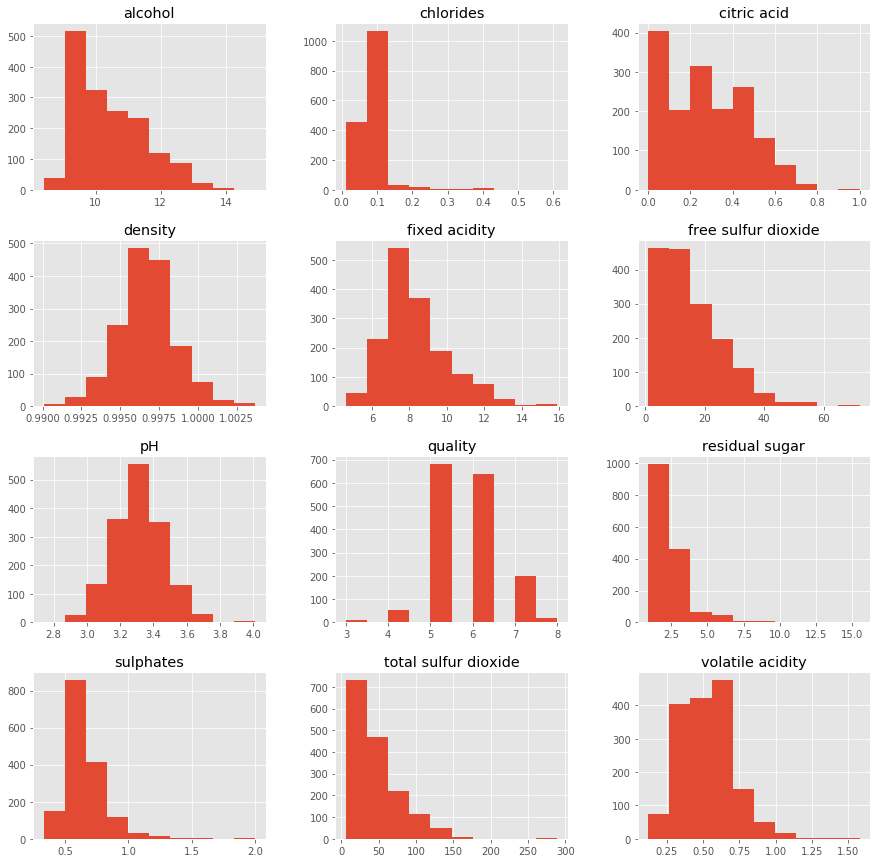

In [8]:
import pandas as pd
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
X = df.drop('quality', 1).values # drop target variable
y1 = df['quality'].values
y1 = y1.astype(numpy.float32)
pd.DataFrame.hist(df, figsize = [15, 15]);

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

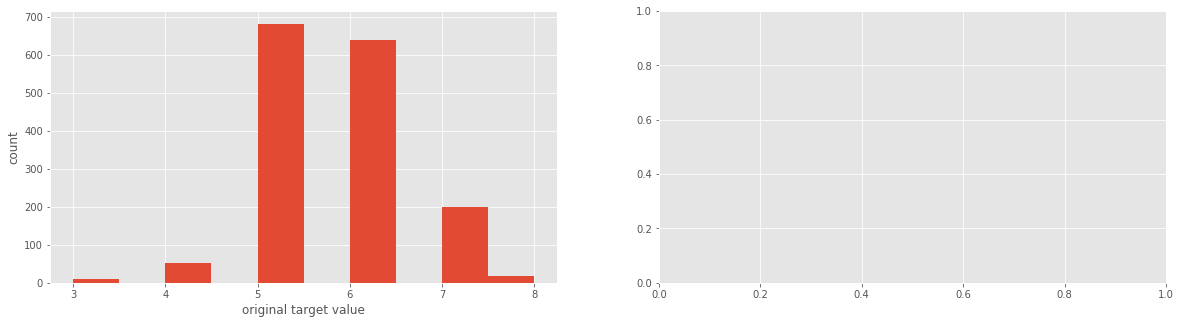

In [9]:
y = y1 <= 5 # is the rating <= 5?
# plot histograms of original target variable
# and aggregated target variable
plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.hist(y1);
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2);
plt.hist(y)
plt.xlabel('aggregated target value')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model_1 = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))

k-NN accuracy for test set: 0.612500


In [17]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.66      0.64      0.65       179
        True       0.56      0.57      0.57       141

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320



In [18]:
### Preprocessing : Scaling in Practice

In [19]:
from sklearn.preprocessing import scale
Xs = scale(X)
from sklearn.model_selection import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.2, random_state = 42)
knn_model_2 = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_2.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))
y_true, y_pred = y_test, knn_model_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

k-NN score for test set: 0.712500
k-NN score for training set: 0.814699
              precision    recall  f1-score   support

       False       0.72      0.79      0.75       179
        True       0.70      0.62      0.65       141

    accuracy                           0.71       320
   macro avg       0.71      0.70      0.70       320
weighted avg       0.71      0.71      0.71       320



In [1]:
### PART 2

In [2]:
# https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-2-centering-scaling-and-logistic-regression
# Discover whether centering and scaling help your model in a logistic regression setting.

In [3]:
# Linear Regression in Python

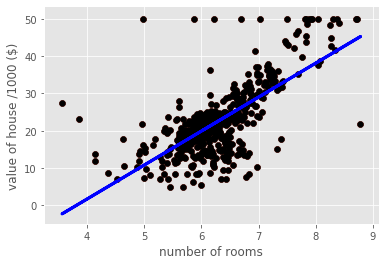

In [4]:
# Import necessary packages
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import datasets
from sklearn import linear_model
import numpy as np

# Load data
boston = datasets.load_boston()
yb = boston.target.reshape(-1, 1)
Xb = boston['data'][:, 5].reshape(-1, 1)

# Plot data
plt.scatter(Xb, yb)
plt.ylabel('value of house /1000 ($)')
plt.xlabel('number of rooms')

# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using training sets
regr.fit(Xb, yb)

# Plot outputs
plt.scatter(Xb, yb, color = 'black')
plt.plot(Xb, regr.predict(Xb), color = 'blue', linewidth = 3)
plt.show()

In [5]:
# Logistic Regression in Python

/Users/brijrajsinhgohil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


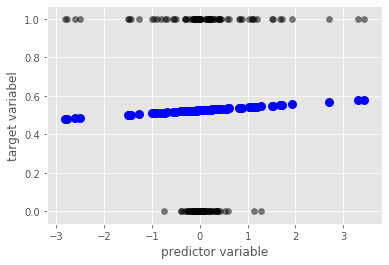

In [9]:
# Synthesize data
X1 = np.random.normal(size = 150)
y1 = (X1 > 0).astype(np.float)
X1[X1 > 0] *= 4
X1 *= .3 * np.random.normal(size = 150)
X1 = X1.reshape(-1, 1)
X1_ordered = np.sort(X1, axis=0)

# Run the classifier
clf = linear_model.LogisticRegression()
clf.fit(X1, y1)

# Plot the result
plt.scatter(X1.ravel(), y1, color = 'black', zorder = 20, alpha = 0.5)
plt.scatter(X1_ordered, clf.predict_proba(X1_ordered)[:, 1], color = 'blue', linewidth = 3)
plt.ylabel('target variabel')
plt.xlabel('predictor variable')
plt.show()

In [10]:
# Logistic Regression and Data Scaling

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

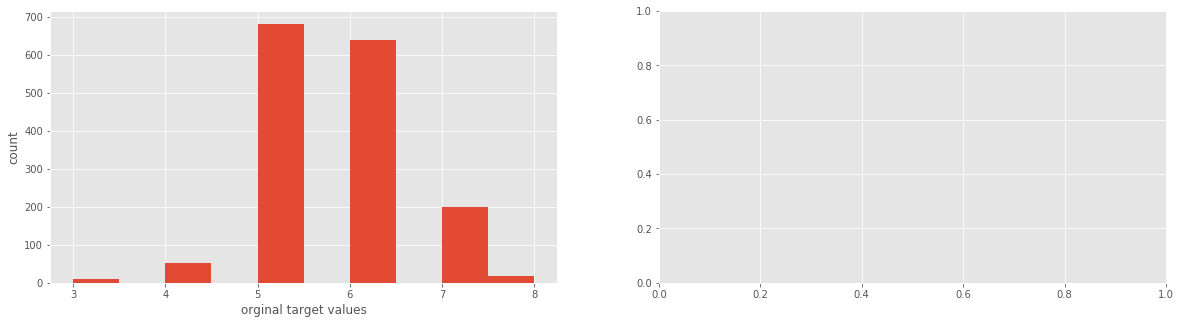

In [11]:
# Import necessary modules
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
X = df.drop('quality', 1).values
y1 = df['quality'].values
y = y1 <= 5

# Plot histograms of original target variable
# and aggregated target variable
plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.hist(y1)
plt.xlabel('orginal target values')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(y)
plt.xlabel('aggregated target value')
plt.show()

In [12]:
# Splot the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# initial logistic regression model
lr = linear_model.LogisticRegression()

# fit the model
lr = lr.fit(X_train, y_train)
print('Logistic Regression score for training set: %f' % lr.score(X_train, y_train))

from sklearn.metrics import classification_report
y_true, y_pred = y_test, lr.predict(X_test)
print(classification_report(y_true, y_pred))

Logistic Regression score for training set: 0.752932
              precision    recall  f1-score   support

       False       0.78      0.74      0.76       179
        True       0.69      0.74      0.71       141

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



/Users/brijrajsinhgohil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
from sklearn.preprocessing import scale
Xs = scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y , test_size = 0.2, random_state = 42)
lr_2 = lr.fit(Xs_train, y_train)
print('Scaled Logistic Regression score for test set: %f' % lr_2.score(Xs_test, y_test))
y_true, y_pred = y_true, lr_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

Scaled Logistic Regression score for test set: 0.740625
              precision    recall  f1-score   support

       False       0.79      0.74      0.76       179
        True       0.69      0.74      0.72       141

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



/Users/brijrajsinhgohil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
